# Prediction of Winner using Logistic Regression from Indian Election Dataset
---

## ICT DataScience Project
    * Topic: Election
    * Batch: 1
    * Group: 3
    * Members: Sandra Anna Shaji
               Basil Chacko Mathew
               Bineeth Mathew
               Neenu Sebastian

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#### Table of Contents
    * Dataset Overview
    * Data Preprocessing
    * Handling missing values
    * Managing categorical values
    * Final overview before modelling data
    * Learning and Predicting
    * Checking the accuracy of the model

## Overview of Dataset

In [46]:
df=pd.read_csv('dataset/29State_Election.csv')
df.head(5)

,Sl No:,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,...,EDUCATION,GRADUATE,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,1,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,...,12th Pass,0.0,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,2,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,...,Post Graduate,1.0,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,3,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,...,12th Pass,0.0,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,4,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,5,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,...,Doctorate,1.0,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


## Data Preprocessing

In [47]:
df.columns

Index(['Sl No:', 'STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL',
       'GENDER', 'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'GRADUATE',
       'ASSETS', 'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
       'TOTAL\nVOTES', 'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

* Removing non-essential columns

In [48]:
# removing non-essential columns
df.drop(['Sl No:','STATE','CONSTITUENCY', 'NAME','SYMBOL','GRADUATE','GENERAL\nVOTES','TOTAL\nVOTES' ,'POSTAL\nVOTES', 'OVER TOTAL ELECTORS \nIN CONSTITUENCY','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],axis=1,inplace=True) 

* Cleaning the data.

In [49]:
## cleaning data for assets column
df['ASSETS'].replace(['Not Available','Nil',np.nan,'`','Telangana'],'0',inplace=True)
a=df['ASSETS'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b=a.apply(lambda x:x.split(','))
c=b.apply(lambda x:''.join(x))
df['ASSETS']=c
df['ASSESTS']=df['ASSETS'].astype(int)

## cleaning data for liabilities column
df['LIABILITIES'].replace(['Not Available','Nil','NIL',np.nan,'`','Telangana'],'0',inplace=True)
a=df['LIABILITIES'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b=a.apply(lambda x:x.split(','))
c=b.apply(lambda x:''.join(x))
df['LIABILITIES']=c
df['LIABILITIES']=df['LIABILITIES'].astype(int)

* Renaming columns.

In [50]:
# renaming some columns
df.columns=['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY','EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL_ELECTORS','ASSESTS']

## Handling missing values

* Visualizing the columns with null values

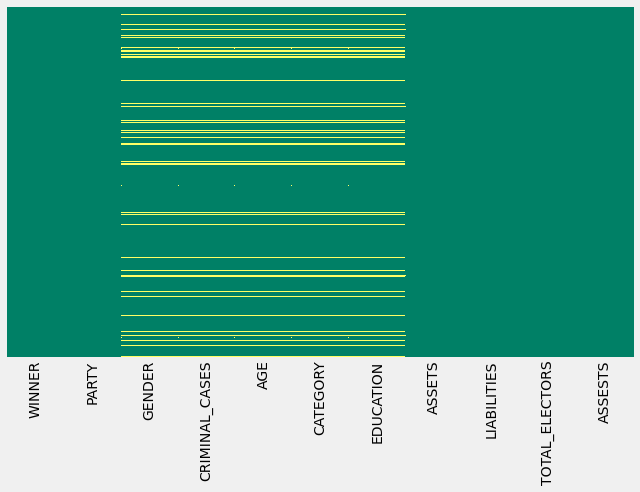

In [51]:
# visualizing the columns with null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')
plt.show()

* Checking the number of null values in each feature.

In [71]:
df.isnull().sum()

WINNER              0
PARTY               0
GENDER            245
CRIMINAL_CASES    245
AGE               245
CATEGORY          245
EDUCATION         245
ASSETS              0
LIABILITIES         0
TOTAL_ELECTORS      0
ASSESTS             0
dtype: int64

* **Insights: In this Dataset contain 245 rows have missing values, also this missing values came form Nota votes. So this is not needed for our winner prediction. Drop these 245 rows from our dataset.**



* Dropping the null values.

In [72]:
# dropping the null values
df.dropna(inplace=True)
df.isnull().sum()

WINNER            0
PARTY             0
GENDER            0
CRIMINAL_CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
ASSETS            0
LIABILITIES       0
TOTAL_ELECTORS    0
ASSESTS           0
dtype: int64

In [73]:
### Noticed that the criminal cases feature has 'Not Available' value which would give an error while training our data
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].apply(lambda x:0 if x=='Not Available' else x)

## Managing categorical values

In [74]:
# we have the following categorical features in our dataset
df[['PARTY','GENDER','CATEGORY','EDUCATION']].head()

,PARTY,GENDER,CATEGORY,EDUCATION
0,BJP,MALE,ST,12th Pass
1,TRS,MALE,ST,Post Graduate
2,INC,MALE,ST,12th Pass
4,BJP,MALE,SC,Doctorate
5,BSP,MALE,SC,Post Graduate


***Lets focus on the PARTY feature and take a look how many categories are there in the dataset***

In [75]:
df['PARTY'].value_counts()

BJP       420
INC       413
IND       201
BSP       163
CPI(M)    100
         ... 
KEC         1
BVA         1
ABSKP       1
WPOI        1
ravp        1
Name: PARTY, Length: 132, dtype: int64

***As we see there are more than 130 parties. we can map all the parties with less than 10 candidates as 'Others'***

In [76]:
df['PARTY']=df['PARTY'].apply(lambda x:x if df['PARTY'].value_counts().loc[x]>10 else 'Others')
df['PARTY'].value_counts()

BJP       420
INC       413
Others    251
IND       201
BSP       163
CPI(M)    100
AITC       47
VBA        47
SP         39
NTK        38
MNM        36
SHS        26
AAP        25
YSRCP      25
TDP        25
DMK        23
NCP        21
AIADMK     21
RJD        21
BJD        21
JnP        20
JD(U)      18
TRS        17
Name: PARTY, dtype: int64

***lets look at the education feature and see what can be done***

In [77]:
df['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

***for better working of our model lets merge some values***

In [78]:
df['EDUCATION'].loc[(df["EDUCATION"]=="Post Graduate\n")]

1880    Post Graduate\n
Name: EDUCATION, dtype: object

In [79]:
df.loc[1880, 'EDUCATION'] = 'Post Graduate'

In [80]:
df.drop('ASSETS',axis=1,inplace=True)
ill=['Others','Not Available','Illiterate']
df['EDUCATION']=df['EDUCATION'].apply(lambda x:'Illiterate' if x in ill else x)
df['EDUCATION'].value_counts()

Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Illiterate                77
Doctorate                 73
Literate                  30
5th Pass                  28
Name: EDUCATION, dtype: int64

In [81]:
df.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,LIABILITIES,TOTAL_ELECTORS,ASSESTS
0,1,BJP,MALE,52,52.0,ST,12th Pass,231450,1489790,3099414
1,0,TRS,MALE,0,54.0,ST,Post Graduate,847000,1489790,18477888
2,0,INC,MALE,3,52.0,ST,12th Pass,15300000,1489790,36491000
4,1,BJP,MALE,5,58.0,SC,Doctorate,8606522,1937690,74274036
5,0,BSP,MALE,0,47.0,SC,Post Graduate,22251891,1937690,133784385


***Now that we have cleaned our categorical features we need to convert them into numerical values and merge them into our dataframe for the algorithm to recognize them.***

In [82]:
dummy=pd.get_dummies(df[['GENDER','CATEGORY','PARTY','EDUCATION']],drop_first=True)
final=pd.concat([df,dummy],axis=1)

***Now we drop our previous categorical columns 'PARTY', 'GENDER', 'CATEGORY', 'EDUCATION'.***

In [83]:
final.drop(['PARTY','GENDER','CATEGORY','EDUCATION'],axis=1,inplace=True)

## Pre-processed Data

In [84]:
final.head()

,WINNER,CRIMINAL_CASES,AGE,LIABILITIES,TOTAL_ELECTORS,ASSESTS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AIADMK,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,1,52,52.0,231450,1489790,3099414,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,54.0,847000,1489790,18477888,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,52.0,15300000,1489790,36491000,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,5,58.0,8606522,1937690,74274036,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,47.0,22251891,1937690,133784385,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Learning and Predicting
---

* ***First we break our data into the Input matrix X and Output vector y***

In [85]:
data=final.copy()

In [86]:
X=data.drop('WINNER',axis=1)
y=data['WINNER']

***Split our data for Training and Testing***

In [87]:
### we'll keep 80% of our data for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Scaling our data to Standard Normal distribution.

In [88]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
df.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'LIABILITIES', 'TOTAL_ELECTORS', 'ASSESTS'],
      dtype='object')

#### Train our data.

In [89]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=0.9)
lgr.fit(X_train,y_train)

LogisticRegression(C=0.9)

#### Predicting the values with test set.

In [90]:
predict=lgr.predict(X_test)

In [91]:
predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

#### Now the data succesfully trained and predicted.

## Checking the accuracy of our model

In [92]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lgr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.99 %
Standard Deviation: 2.05 %


## Classification Report.

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       363
           1       0.69      0.74      0.71       142

    accuracy                           0.83       505
   macro avg       0.79      0.80      0.80       505
weighted avg       0.84      0.83      0.84       505



**The model has an accuracy of 85.99%**

Text(0.5, -1.340000000000014, 'Predicted')

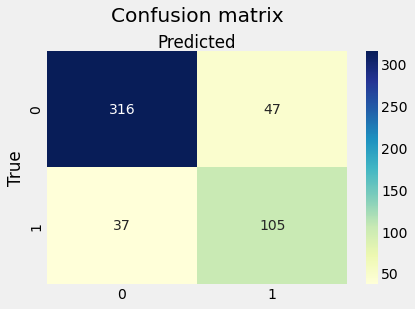

In [96]:

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predict)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [105]:
X_test[:1]

array([[ 0.282321  , -1.55848635,  0.01643027, -0.27240466,  0.10271759,
         0.38237694, -0.4962794 , -0.36398493, -0.10660036, -0.15161961,
        -0.0966414 , -0.50041305, -0.3053    , -0.23314245, -0.10972754,
        -0.5138028 , -0.33784381, -0.0966414 , -0.08941292, -0.12961896,
        -0.10006673, -0.13979191, -0.37553381, -0.10660036, -0.10972754,
        -0.14222962, -0.10006673, -0.10006673, -0.15832798,  8.86744489,
        -0.38124065, -0.11277206, -0.20143911, -0.19785942, -0.5271353 ,
        -0.45234703, -0.19604882, -0.12695747,  1.73281433]])

In [104]:
lgr.predict(X_test[:1])

array([1])